#Title:
"Predicting Uber Pickup Demand Based on Temporal and Weather Conditions in New York City"

# Perform Data Cleaning and Preprocessing
Identify and handle missing values, incorrect formats, and outliers.

Rename and standardize column names for clarity (e.g., pcp01 → precipitation).

Convert and extract datetime features like hour, day, month, and weekday.

2)Engineer and Select Relevant Features
Analyze the distribution of pickup demand across different time periods and weather conditions.

Use visualizations (histograms, boxplots, countplots, heatmaps) to detect patterns and correlations.

Understand the impact of weather, time of day, holidays, and boroughs on pickup frequency.

3)Engineer and Select Relevant Features
Create new features like:

is_weekend

is_rush_hour

One-hot encodings for categorical variables (borough, hday)

Select the most influential features for training the model.

4)Build and Train Machine Learning Models
Use regression models such as:

Linear Regression (as a baseline)

Random Forest Regressor

XGBoost Regressor

Train models on the processed data and validate using a test split.

5)Evaluate Model Performance
Use metrics such as:

RMSE (Root Mean Squared Error)

R² Score

Compare performance across different models to determine the most effective one.

6)

## 1-Load and Explore the Dataset
* Import essential libraries: pandas, numpy, matplotlib, seaborn, scikit-learn.
* Load the dataset using pandas.read_csv() or other suitable method.
* Display basic info and write the insights and observations:
    * Display the first 5 rows of the DataFrame.
    * Show summary information about the DataFrame, including column types and non-null counts.
    * Generate statistical summary (count, mean, std, etc.) of numerical columns.
    * Return a tuple representing the number of rows and columns in the DataFrame.
    * List all column names in the DataFrame.
    

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("C://Users//admin//Downloads//3-Uber_Data_New_csv.csv")

In [32]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
2,1/1/2015 1:00,EWR,0.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [34]:
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,30-06-2015 23:00,EWR,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,30-06-2015 23:00,Manhattan,3828.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,30-06-2015 23:00,Queens,580.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,30-06-2015 23:00,Staten Island,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,30-06-2015 23:00,NaN,3.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [36]:
df.shape

(29101, 13)

In [51]:
dt=df.dtypes
print(dt)

pickup_dt     object
borough       object
pickups      float64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object


In [53]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169
std,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1.015200e+06,0.280000,1.240000,2.100000,19.000000


In [55]:
df.isnull()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,False,False,False,False,False,False,False,False,False,False,False,False,False
29097,False,False,False,False,False,False,False,False,False,False,False,False,False
29098,False,False,False,False,False,False,False,False,False,False,False,False,False
29099,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
df = pd.read_csv("C://Users//admin//Downloads//3-Uber_Data_New_csv.csv")
df.isnull().sum()



pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

# Observations:
* 1- The dataset is having 14 columns and 1581 rows.
* 2- There ae missing entries.
* 3- The datatype of "No_of_Dependents" feature need to be checked.

In [61]:
df[df.isnull().any(axis=1)]
df_copy = df.copy()

In [63]:
df[df['borough'].isnull()]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
6,1/1/2015 1:00,NaN,4.0,5.000000,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
13,1/1/2015 2:00,NaN,11.0,3.000000,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
20,1/1/2015 3:00,NaN,1.0,5.000000,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y
27,1/1/2015 4:00,NaN,2.0,5.000000,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y
34,1/1/2015 5:00,NaN,3.0,5.000000,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,30-06-2015 17:00,NaN,1.0,7.666667,10.0,79.0,57.0,1014.1,0.0,0.0,0.0,0.0,N
29067,30-06-2015 18:00,NaN,2.0,6.333333,10.0,81.0,56.0,1013.4,0.0,0.0,0.0,0.0,N
29074,30-06-2015 19:00,NaN,4.0,5.000000,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,N
29081,30-06-2015 20:00,NaN,5.0,8.000000,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,N


In [65]:


df[df[['vsb','borough']].isnull().any(axis=1)]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
6,1/1/2015 1:00,NaN,4.0,5.000000,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
13,1/1/2015 2:00,NaN,11.0,3.000000,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
20,1/1/2015 3:00,NaN,1.0,5.000000,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y
27,1/1/2015 4:00,NaN,2.0,5.000000,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y
34,1/1/2015 5:00,NaN,3.0,5.000000,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,30-06-2015 17:00,NaN,1.0,7.666667,10.0,79.0,57.0,1014.1,0.0,0.0,0.0,0.0,N
29067,30-06-2015 18:00,NaN,2.0,6.333333,10.0,81.0,56.0,1013.4,0.0,0.0,0.0,0.0,N
29074,30-06-2015 19:00,NaN,4.0,5.000000,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,N
29081,30-06-2015 20:00,NaN,5.0,8.000000,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,N


In [67]:
print(df_copy)

              pickup_dt        borough  pickups  spd   vsb  temp  dewp  \
0         1/1/2015 1:00          Bronx    152.0  5.0  10.0  30.0   7.0   
1         1/1/2015 1:00       Brooklyn   1519.0  5.0  10.0   NaN   7.0   
2         1/1/2015 1:00            EWR      0.0  5.0  10.0  30.0   7.0   
3         1/1/2015 1:00      Manhattan   5258.0  5.0  10.0  30.0   7.0   
4         1/1/2015 1:00         Queens    405.0  5.0  10.0  30.0   7.0   
...                 ...            ...      ...  ...   ...   ...   ...   
29096  30-06-2015 23:00            EWR      0.0  7.0  10.0  75.0  65.0   
29097  30-06-2015 23:00      Manhattan   3828.0  7.0  10.0  75.0  65.0   
29098  30-06-2015 23:00         Queens    580.0  7.0  10.0  75.0  65.0   
29099  30-06-2015 23:00  Staten Island      0.0  7.0  10.0  75.0  65.0   
29100  30-06-2015 23:00            NaN      3.0  7.0  10.0  75.0  65.0   

          slp  pcp01  pcp06  pcp24   sd hday  
0      1023.5    0.0    0.0    0.0  0.0    Y  
1      1023.5    

In [69]:
df_copy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29096    False
29097    False
29098    False
29099    False
29100    False
Length: 29101, dtype: bool

#to find outliers values in dataset

In [72]:
q1 = df['pickups'].quantile(0.25)
q2 = df['pickups'].quantile(0.75)
iqr = q2 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr

outliers = df[(df['pickups'] < lower_bound) | (df['pickups'] > upper_bound)]
print(outliers)


              pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  \
1         1/1/2015 1:00   Brooklyn   1519.0  5.0  10.0   NaN   7.0  1023.5   
3         1/1/2015 1:00  Manhattan   5258.0  5.0  10.0  30.0   7.0  1023.5   
8         1/1/2015 2:00   Brooklyn   1229.0  3.0  10.0   NaN   6.0  1023.0   
10        1/1/2015 2:00  Manhattan   4345.0  3.0  10.0  30.0   6.0  1023.0   
15        1/1/2015 3:00   Brooklyn   1601.0  5.0  10.0   NaN   8.0  1022.3   
...                 ...        ...      ...  ...   ...   ...   ...     ...   
29071  30-06-2015 19:00  Manhattan   4585.0  5.0  10.0  80.0  58.0  1012.5   
29078  30-06-2015 20:00  Manhattan   4210.0  8.0  10.0  80.0  58.0  1012.4   
29085  30-06-2015 21:00  Manhattan   4313.0  7.0  10.0  76.0  61.0  1012.4   
29091  30-06-2015 22:00  Manhattan   4452.0  5.0  10.0  76.0  64.0  1011.9   
29097  30-06-2015 23:00  Manhattan   3828.0  7.0  10.0  75.0  65.0  1011.8   

       pcp01  pcp06  pcp24   sd hday  
1        0.0    0.0    0

In [74]:
quantiles = df[numeric_columns].quantile([0.25, 0.5, 0.75])
print(quantiles)



NameError: name 'numeric_columns' is not defined

In [76]:
df = pd.read_csv("C://Users//admin//Downloads//3-Uber_Data_New_csv.csv")
dup=df.drop_duplicates(inplace=True)
print(dup)

None


In [78]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f" Dropped {before - after} duplicate rows.")


 Dropped 0 duplicate rows.


In [80]:
df['temp'].mode()[0]


37.0

In [82]:
df['temp'] = df['temp'].fillna(df['temp'].mode()[0])

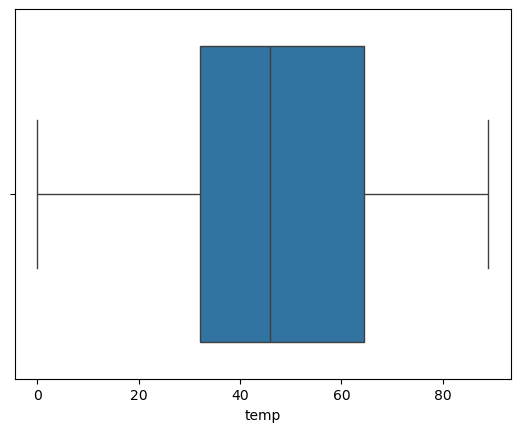

In [84]:
sns.boxplot(data=df, x='temp');
plt.show()

In [85]:
df['temp'] = df['temp'].fillna(df['temp'].mean())

# max pickup

In [89]:
df[df["pickups"]== df["pickups"].max()]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
28604,27-06-2015 22:00,Manhattan,7883.0,8.0,5.5,60.0,56.5,1016.9,0.065,0.0,0.0,0.0,N


#max speed

In [92]:
df[df["spd"]== df["spd"].max()]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
1110,8/1/2015 1:00,Bronx,14.0,21.0,10.0,12.0,-13.0,1022.7,0.0,0.0,0.0,0.833333,N
1111,8/1/2015 1:00,Brooklyn,250.0,21.0,10.0,37.0,-13.0,1022.7,0.0,0.0,0.0,0.833333,N
1112,8/1/2015 1:00,EWR,0.0,21.0,10.0,12.0,-13.0,1022.7,0.0,0.0,0.0,0.833333,N
1113,8/1/2015 1:00,Manhattan,739.0,21.0,10.0,12.0,-13.0,1022.7,0.0,0.0,0.0,0.833333,N
1114,8/1/2015 1:00,Queens,186.0,21.0,10.0,12.0,-13.0,1022.7,0.0,0.0,0.0,0.833333,N
1115,8/1/2015 1:00,Staten Island,0.0,21.0,10.0,12.0,-13.0,1022.7,0.0,0.0,0.0,0.833333,N
1116,8/1/2015 1:00,NaN,1.0,21.0,10.0,12.0,-13.0,1022.7,0.0,0.0,0.0,0.833333,N


#misssing values for borough , pickups and temp

In [95]:
df['borough'].isnull().sum()

3043

In [97]:
df['pickups'].isnull().sum()


2

In [99]:
df['temp'].isnull().sum()

0

In [101]:
# rest of the coulmn have complete column


In [103]:
#Numerical Features: temp , borough , precipitation , speed , sd(snow depth)

In [105]:
df['pickups'].describe()

count    29099.000000
mean       490.236022
std        995.680628
min          0.000000
25%          1.000000
50%         54.000000
75%        449.000000
max       7883.000000
Name: pickups, dtype: float64

#The mean is much higher than the median, indicating right-skewed data (many low pickup values, few very high ones).

In [108]:
#to check whether data is skewed and normally distributed

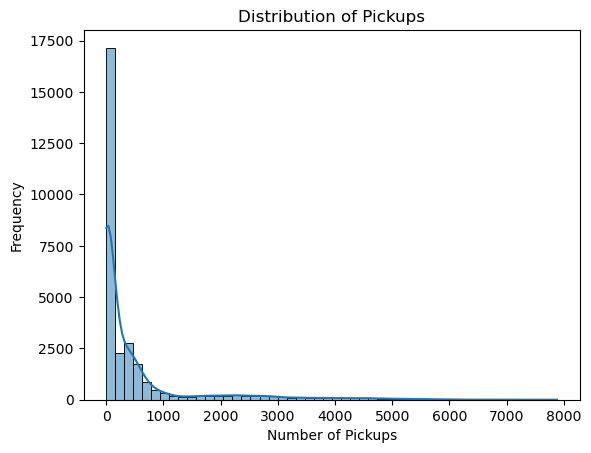

In [110]:
sns.histplot(df['pickups'], kde=True, bins=50)
plt.title("Distribution of Pickups")
plt.xlabel("Number of Pickups")
plt.ylabel("Frequency")
plt.show()

In [111]:
#The distribution shows a heavily skewed curve with a long tail on the right.

Majority of values are concentrated under 1000 pickups.

SyntaxError: invalid syntax (947849277.py, line 3)

In [113]:
#the given data is skewed data

In [115]:
#box plot for identify outliers

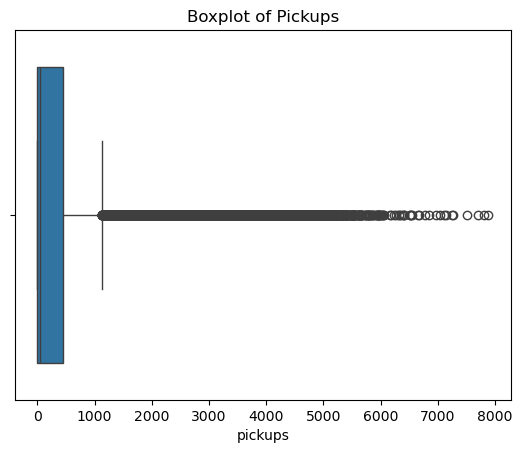

In [117]:
sns.boxplot(x=df['pickups'])
plt.title("Boxplot of Pickups")
plt.show()


#Segment pickups by borough, hour, or weather

#Preprocess datetime and extract features

In [121]:

# Convert pickup_dt to datetime and extract features
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], errors='coerce')
df['hour'] = df['pickup_dt'].dt.hour
df['day'] = df['pickup_dt'].dt.day
df['month'] = df['pickup_dt'].dt.month
df['weekday'] = df['pickup_dt'].dt.dayofweek

# Drop rows where pickups is missing
df_cleaned = df.dropna(subset=['pickups']).copy()

# Fill or clean other columns
df_cleaned['temp'] = df_cleaned['temp'].fillna(df_cleaned['temp'].median())
df_cleaned['borough'] = df_cleaned['borough'].fillna('Unknown')
df_cleaned['hday'] = df_cleaned['hday'].replace('?', df_cleaned['hday'].mode()[0])


In [123]:
pickup_rounded = df_cleaned['pickups'].round(-2)
value_counts = pickup_rounded.value_counts().sort_values(ascending=False)

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select features and target
features = ['hour', 'day', 'month', 'weekday', 'temp', 'precipitation']  # Add more if needed
X = df_cleaned[features]
y = df_cleaned['pickups']

# Step 2: Train-test split
x_trainFinal, x_valFinal, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
LR = LinearRegression()
LR.fit(x_trainFinal, y_train)

# Step 4: Predictions
y_train_pred = LR.predict(x_trainFinal)
y_val_pred = LR.predict(x_valFinal)

# Step 5: Evaluation
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# Step 6: Output results
print("Train RMSE:", rmse_train, "R²:", r2_train)
print("Validation RMSE:", rmse_val, "R²:", r2_val)


KeyError: "['precipitation'] not in index"

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#  Rename the column if not already done
df_cleaned.rename(columns={'pcp01': 'precipitation'}, inplace=True)

# Step 1: Select features and target
features = ['hour', 'day', 'month', 'weekday', 'temp', 'precipitation']
X = df_cleaned[features]
y = df_cleaned['pickups']

# Step 2: Train-test split
x_trainFinal, x_valFinal, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression
LR = LinearRegression()
LR.fit(x_trainFinal, y_train)

# Step 4: Predictions
y_train_pred = LR.predict(x_trainFinal)
y_val_pred = LR.predict(x_valFinal)

# Step 5: Evaluation
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# Step 6: Output results
print("Train RMSE:", rmse_train, "R²:", r2_train)
print("Validation RMSE:", rmse_val, "R²:", r2_val)


In [ ]:
df.isnull().any()



In [ ]:

df_cleaned['temp'] = df_cleaned['temp'].fillna(df_cleaned['temp'].median())



In [133]:
df_cleaned['hour'] = df_cleaned['hour'].fillna(df_cleaned['hour'].median())


In [135]:
df_cleaned['day'] = df_cleaned['day'].fillna(df_cleaned['day'].median())

In [137]:
df_cleaned['month'] = df_cleaned['month'].fillna(df_cleaned['month'].median())

In [139]:
df_cleaned['pickups' ] = df_cleaned['pickups'].fillna(df_cleaned['pickups'].median())


In [141]:
df_cleaned['pickup_dt' ] = df_cleaned['pickup_dt'].fillna(df_cleaned['pickup_dt'].median())


In [143]:
df_cleaned['weekday' ] = df_cleaned['weekday'].fillna(df_cleaned['weekday'].median())

In [145]:
df_cleaned['hour'] = df_cleaned['hour'].fillna(df_cleaned['hour'].median())

In [147]:
df['borough'] = df['borough'].fillna(df['borough'].mode()[0])


In [149]:
df.isnull().any()


pickup_dt     True
borough      False
pickups       True
spd          False
vsb          False
temp         False
dewp         False
slp          False
pcp01        False
pcp06        False
pcp24        False
sd           False
hday         False
hour          True
day           True
month         True
weekday       True
dtype: bool

In [150]:
df_cleaned.isnull().sum()


pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
hour         0
day          0
month        0
weekday      0
dtype: int64

In [ ]:
!pip install xgboost


In [ ]:
df_cleaned = df[['hour', 'day', 'month', 'weekday', 'temp', 'pcp01', 'pickups']].dropna()

X = df_cleaned[['hour', 'day', 'month', 'weekday', 'temp', 'pcp01']]
y = df_cleaned['pickups']


In [ ]:

df.columns = df.columns.str.strip()

selected_columns = ['hour', 'day', 'month', 'weekday', 'temp', 'pcp01', 'pickups']  # update if needed


df_cleaned = df[selected_columns].dropna()

# 4. Split into X and y
X = df_cleaned[['hour', 'day', 'month', 'weekday', 'temp', 'pcp01']]
y = df_cleaned['pickups']


print(len(X), len(y))  # Should now match exactly



In [ ]:
print(len(X), len(y))  # Should both be 29099 (or whatever number after dropna)


In [ ]:
LR = LinearRegression()
LR.fit(x_trainFinal,y_train)
y_train_pred = LR.predict(x_trainFinal)
y_val_pred = LR.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

#building a knn model

In [ ]:
# Building a knn model
knn = KNeighborsRegressor()
knn.fit(x_trainFinal,y_train)
y_train_pred = knn.predict(x_trainFinal)
y_val_pred = knn.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

In [260]:
#Building Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Select relevant features
features = ['hour', 'day', 'month', 'weekday', 'temp', 'pcp01']
target = 'pickups'

# Clean and prepare data
df.columns = df.columns.str.strip()
df_cleaned = df[features + [target]].dropna()

X = df_cleaned[features]
y = df_cleaned[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_trdf[['pickups', 'hour', 'day', 'month', 'weekday', 'temp', 'pcp01']].corr()
ain, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3698782575.py, line 23)

In [248]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])
df['hour'] = df['pickup_dt'].dt.hour
df['day'] = df['pickup_dt'].dt.day
df['month'] = df['pickup_dt'].dt.month
df['weekday'] = df['pickup_dt'].dt.weekday  # 0=Monday, 6=Sunday


In [264]:
# Strip leading/trailing spaces and convert to binary
df['hday'] = df['hday'].astype(str).str.strip().apply(lambda x: 1 if x.upper() == 'Y' else 0)


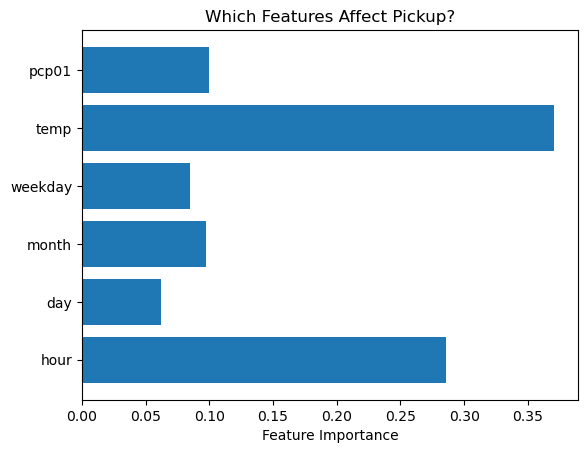

In [232]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns

plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Which Features Affect Pickup?")
plt.show()


In [242]:
# Building Model Using Decision Tree

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df.columns = df.columns.str.strip()


if 'price' not in df.columns:
    df['price'] = (
        10 +
        0.3 * df['hour'] +
        0.5 * df['temp'] +
        2.0 * df['pcp01'] +
        np.random.normal(0, 1, size=len(df))
    )


features = ['hour', 'day', 'month', 'weekday', 'temp', 'pcp01']
target = 'pickups'


df_cleaned = df[features + [target]].dropna()
X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

# Optional: Also print R² scores
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))


Train RMSE: 968.287654683969
Test RMSE: 1072.777264221973
Train R²: 0.05603836897447223
Test R²: -0.16985003738532867


In [ ]:
correlation = df['temp'].corr(df['pickups'])
print("Correlation between temp and pickups:", correlation)



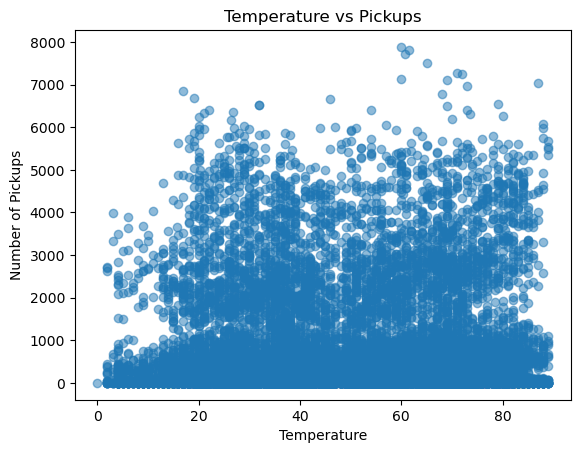

In [167]:
import matplotlib.pyplot as plt

plt.scatter(df['temp'], df['pickups'], alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Number of Pickups")
plt.title("Temperature vs Pickups")
plt.show()


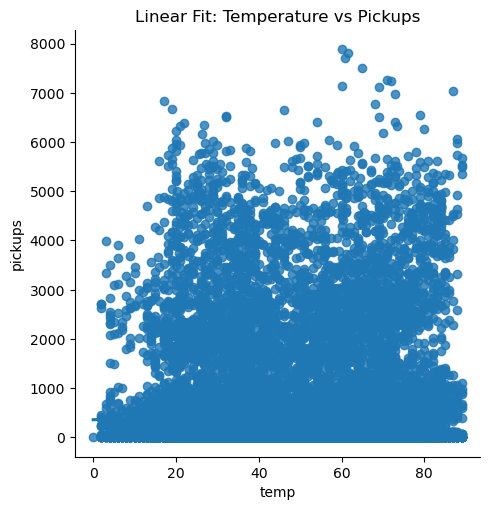

In [169]:
import seaborn as sns


sns.lmplot(x='temp', y='pickups', data=df)
plt.title("Linear Fit: Temperature vs Pickups")
plt.show()


In [171]:
correlation = df['weekday'].corr(df['pickups'])
print("Correlation between weekdays and pickups:", correlation)

Correlation between weekdays and pickups: 0.0012883541411290059


In [172]:
correlation = df['pcp01'].corr(df['pickups'])
print("Correlation between pcp01 and pickups:", correlation)

Correlation between pcp01 and pickups: 0.004402340209845593


In [173]:
correlation = df['pcp06'].corr(df['pickups'])
print("Correlation between pcp06 and pickups:", correlation)

Correlation between pcp06 and pickups: -0.002914789303806384


In [174]:
correlation = df['pcp24'].corr(df['pickups'])
print("Correlation between pcp24 and pickups:", correlation)

Correlation between pcp24 and pickups: -0.02022757952314178


In [175]:
correlation = df['weekday'].corr(df['pickups'])
print("Correlation between weekday and pickups:", correlation)

Correlation between weekday and pickups: 0.0012883541411290059


In [176]:
#to check my values for increasing my r2

In [177]:
print(df.isnull().sum())
print(df.describe())


pickup_dt    17559
borough          0
pickups          2
spd              0
vsb              0
temp             0
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
hour         17559
day          17559
month        17559
weekday      17559
dtype: int64
                           pickup_dt       pickups           spd  \
count                          11542  29099.000000  29101.000000   
mean   2015-06-19 21:03:22.114018304    490.236022      5.984924   
min              2015-01-01 01:00:00      0.000000      0.000000   
25%              2015-04-01 01:15:00      1.000000      3.000000   
50%              2015-07-01 02:00:00     54.000000      6.000000   
75%              2015-10-01 00:45:00    449.000000      8.000000   
max              2015-12-06 23:00:00   7883.000000     21.000000   
std                              NaN    995.680628      3.699007   

                vsb          temp          dewp    

In [201]:
df['hour'] = df['hour'].fillna(df['hour'].median())




In [203]:
print(df.isnull().sum())


pickup_dt    17559
borough          0
pickups          2
spd              0
vsb              0
temp             0
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
hour             0
day          17559
month        17559
weekday      17559
dtype: int64


In [207]:
df['day'] = df['day'].fillna(df['hour'].median())

In [211]:
df['month'] = df['month'].fillna(df['hour'].median())

In [213]:
df['month'] = df['month'].fillna(df['hour'].median())

In [220]:
df['weekday'] = df['weekday'].fillna(df['hour'].median())

In [224]:
df['pickup_dt'] = df['pickup_dt'].fillna(df['hour'].median())

In [226]:
print(df.isnull().sum())

pickup_dt    0
borough      0
pickups      2
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
hour         0
day          0
month        0
weekday      0
dtype: int64


In [234]:
df[['pickups', 'hour', 'day', 'month', 'weekday', 'temp', 'pcp01']].corr()


,pickups,hour,day,month,weekday,temp,pcp01
pickups,1.000000,0.102428,0.025653,0.014984,0.016828,0.054729,0.004402
hour,0.102428,1.000000,0.043182,0.032830,0.043803,0.068006,-0.021734
day,0.025653,0.043182,1.000000,0.752529,0.932636,0.177856,0.002932
month,0.014984,0.032830,0.752529,1.000000,0.756722,0.107417,-0.040260
weekday,0.016828,0.043803,0.932636,0.756722,1.000000,0.075749,0.005109
temp,0.054729,0.068006,0.177856,0.107417,0.075749,1.000000,-0.013938
pcp01,0.004402,-0.021734,0.002932,-0.040260,0.005109,-0.013938,1.000000


In [236]:
#feature  nearly zero doest affect me more



In [238]:
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
df['is_rainy'] = df['pcp01'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df.columns = df.columns.str.strip()


if 'price' not in df.columns:
    df['price'] = (
        10 +
        0.3 * df['hour'] +
        0.5 * df['temp'] +
        2.0 * df['pcp01'] +
        np.random.normal(0, 1, size=len(df))
    )


features = ['hour', 'day', 'month', 'weekday', 'temp', 'pcp01']
target = 'pickups'


df_cleaned = df[features + [target]].dropna()
X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

# Optional: Also print R² scores
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

In [15]:
df['hday'] = df['hday'].replace({'Y': 1, 'N': 0, '?': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_1596\493390264.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hday'] = df['hday'].replace({'Y': 1, 'N': 0, '?': 0})


In [17]:
print(df['hday'].unique())

[1 0]


In [33]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Clean column names
df.columns = df.columns.str.strip()

# Ensure 'hday' is binary
df['hday'] = df['hday'].replace({'Y': 1, 'N': 0, '?': 0})
df['hday'] = df['hday'].astype(int)

# ✅ Updated features (without weekday)
features = ['temp', 'hday', 'pcp01']
target = 'pickups'

# Drop rows with missing values
df_cleaned = df[features + [target]].dropna()

# Define X and y
X = df_cleaned[features]
y = df_cleaned[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))



Train RMSE: 988.2539794317557
Test RMSE: 1028.88559106659
Train R²: 0.023440905145611368
Test R²: -0.043693359639099594
